/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


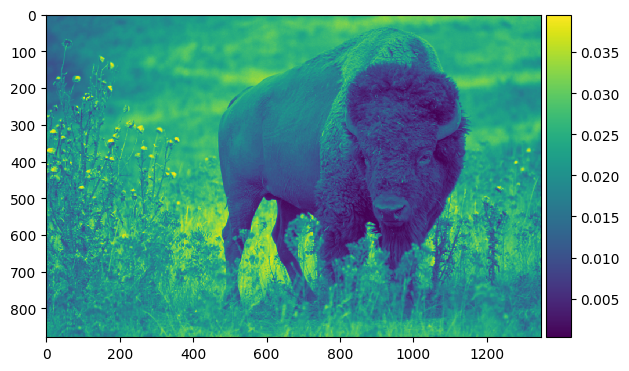

<Figure size 640x480 with 0 Axes>

In [14]:
#Definiowanie funkcji

#Import potrzebnych bibliotek
from skimage import io
import numpy as np

#Zdefinowanie funkcji do ładowania obrazu (zamiast from skimage.color import rgb2gray można od razu zamienić na odpowiedni kolor)
def load_image(path):
    return io.imread(path, as_gray=True)

def apply_kernel(image, kernel):
    #Definujemy zmienne height oraz width, które są wyskością, oraz szerokością przekazanego argumentu image obrazu  (image.shape[0],image.shape[1])
    height, width = image.shape
    #Definujemy zmienne kernelHeight oraz kernelWidth, które są wysokością oraz szerokośćią jądra, przekazanego w argumencie (kernel.shap[0],kernel.shap[1])
    kernelHeight, kernelWidth = kernel.shape
    #Definujemy wymiary nowego obrazu jako wysokość/szerokośc obrazu - wysokość/szerokość kernela +1
    new_image = np.zeros((height - kernelHeight + 1, width - kernelWidth + 1))

    #Przechodzimy przez cały obraz
    for i in range(height - kernelHeight + 1):
        for j in range(width - kernelWidth + 1):
            new_image[i, j] = np.sum(image[i:i+kernelHeight, j:j+kernelWidth] * kernel) / (kernelHeight * kernelWidth)

    return new_image

def downsample_image(image, factor):
    return image[::factor, ::factor]
#--------------------------------------------------------------
#Definowanie parametrów i wywoływanie funkcji


# Ładowanie obrazu
image = load_image("/content/Bison.jpg")

# Definowanie jądra uśredniającego
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size)) / kernel_size**2

# Zastosowanie splotu z jądrem
convoluted_image = apply_kernel(image, kernel)

# Zmniejszamy rozmiar obrazu
downsampled_image = downsample_image(convoluted_image, 2)

# Zapisywanie pomniejszonego obrazku
result_image = io.imshow(downsampled_image)
io.show()

plt.savefig('result_image.png')